In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import scipy.stats as st

In [37]:
df = pd.read_csv('records.csv')

In [38]:
def plot_t_days(time):
    for i in range(100):
        if df.iloc[i][1]==-1:
            plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='black', facecolors='none')
        else:
            if time<df.iloc[i][1]:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='black', facecolors='none')
            elif df.iloc[i][1]<=time<df.iloc[i][2]:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='red', facecolors='red')
            else:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='blue', facecolors='blue')
    plt.show()

In [39]:
x = df["position_x"]
y = df["position_y"]

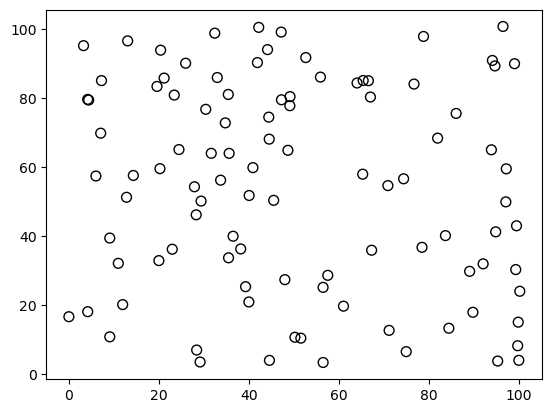

In [5]:
#Each individuals' location before the outbreak
plt.scatter(x, y, marker = "o", s = 50, edgecolors='black', facecolors='none')
plt.show()

In [40]:
X = df[["position_x", "position_y"]].values
n_clusters = 3
# Initialize and fit the KMeans model
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster.labels_ 

/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


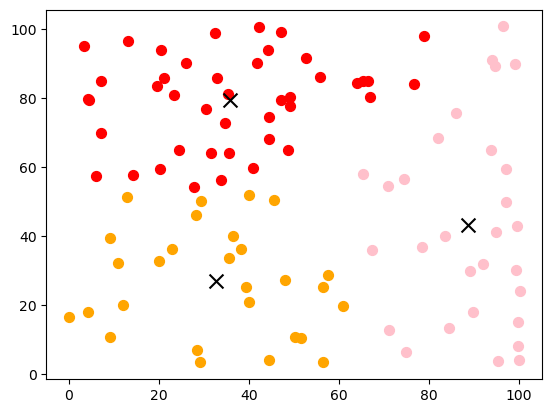

In [41]:
centroid = cluster.cluster_centers_
color=['red','pink','orange','gray','yellow','purple']
fig, axi1=plt.subplots(1)
for i in range(n_clusters):
    axi1.scatter(X[y_pred==i, 0], X[y_pred==i, 1],
               marker='o',
               s=50,
               c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')

In [42]:
df["cluster_id"] = y_pred

In [43]:
df

,id,time_of_infected,time_of_removed,position_x,position_y,susceptibility level,infectivity level,cluster_id
0,0,5,8,52.62,91.66,0.39,1,0
1,1,5,8,27.90,54.20,0.94,1,0
2,2,6,9,4.41,79.35,0.74,1,0
3,3,6,9,71.12,12.56,0.49,1,1
4,4,5,8,47.16,99.05,0.97,1,0
...,...,...,...,...,...,...,...,...
95,95,2,5,44.40,74.39,0.77,1,0
96,96,4,7,3.27,95.12,0.56,1,0
97,97,-1,-1,42.17,100.42,0.37,1,0
98,98,5,8,20.00,32.79,0.55,1,2


In [44]:
df.to_csv("records.csv", index=False)

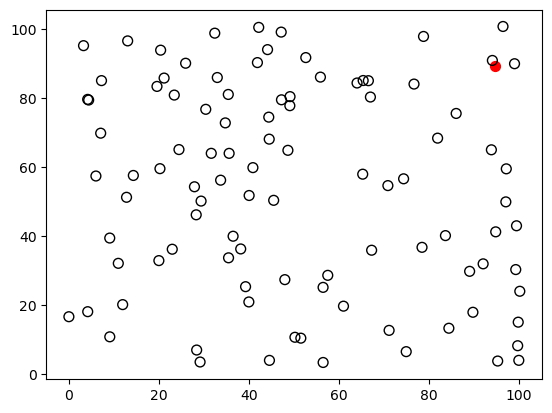

In [35]:
#t day after the outbreak
#compare with epiILM
#cran fortran 
plot_t_days(0)

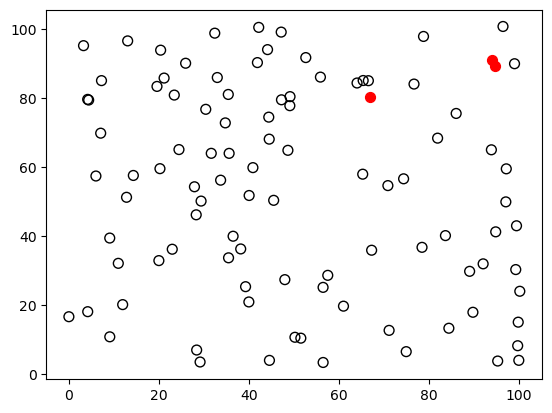

In [111]:
plot_t_days(1)

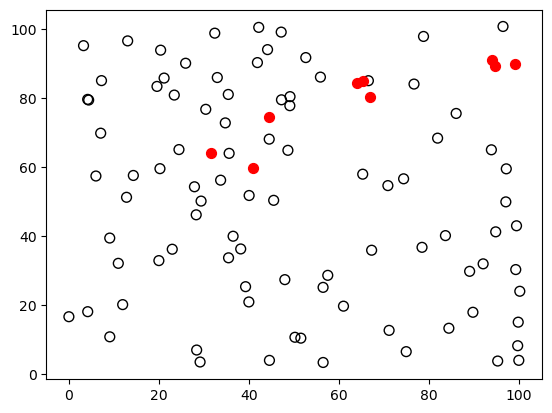

In [112]:
plot_t_days(2)

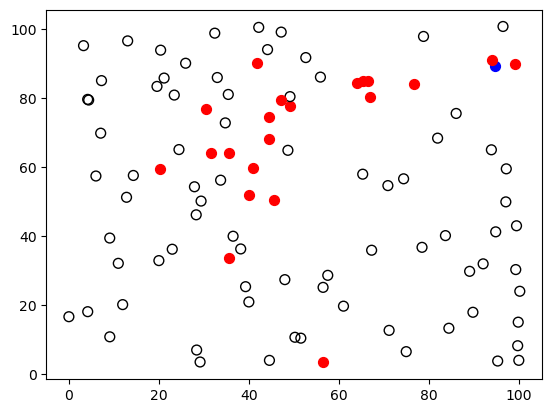

In [113]:
plot_t_days(3)

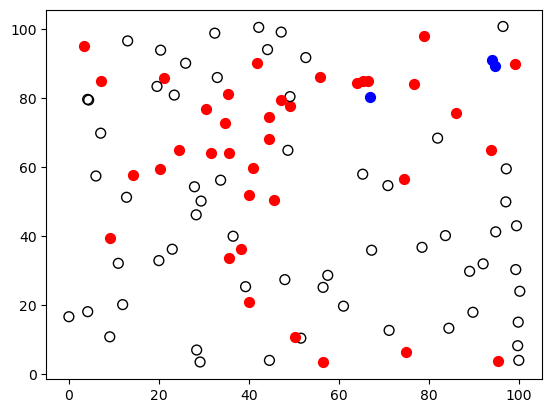

In [114]:
plot_t_days(4)

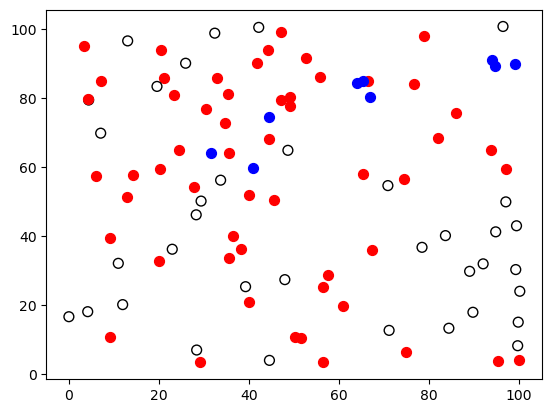

In [115]:
plot_t_days(5)

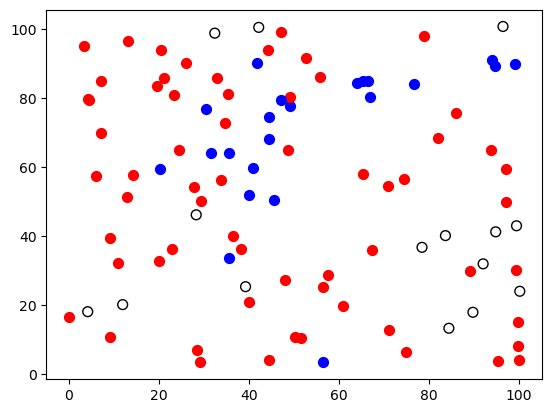

In [116]:
plot_t_days(6)

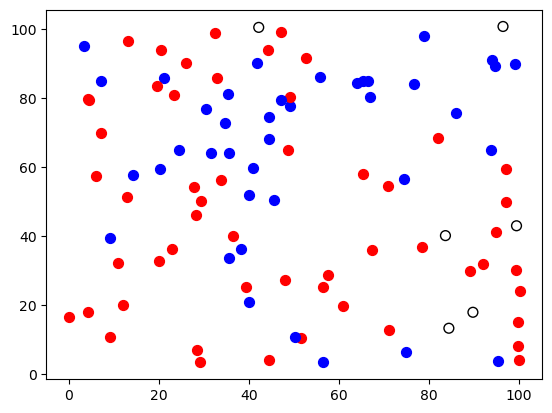

In [117]:
plot_t_days(7)

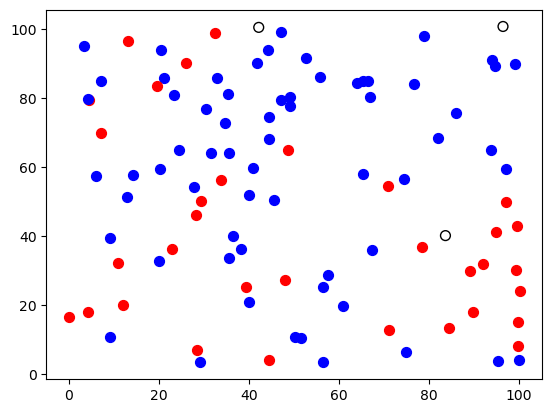

In [118]:
plot_t_days(8)

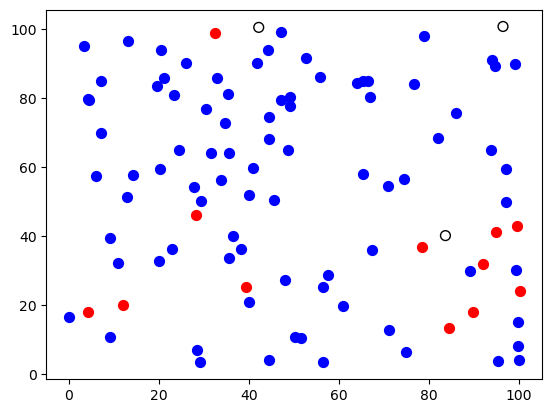

In [119]:
plot_t_days(9)

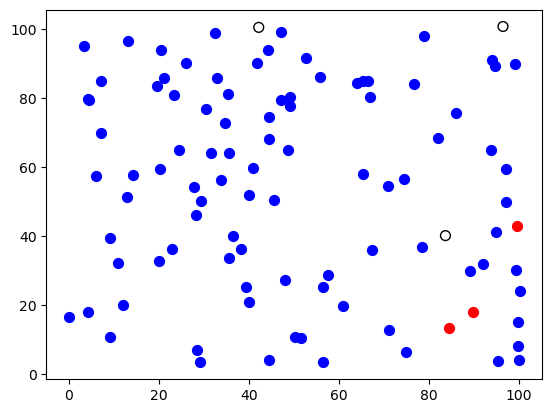

In [120]:
plot_t_days(10)

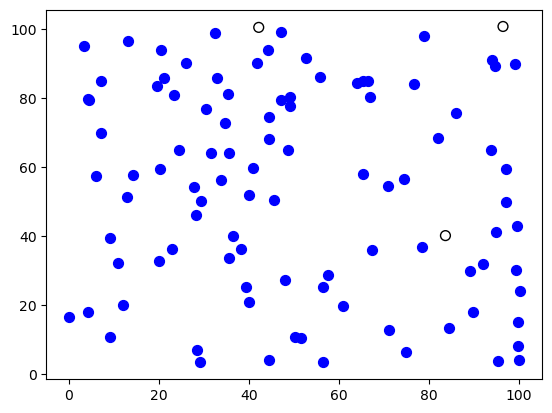

In [121]:
plot_t_days(11)

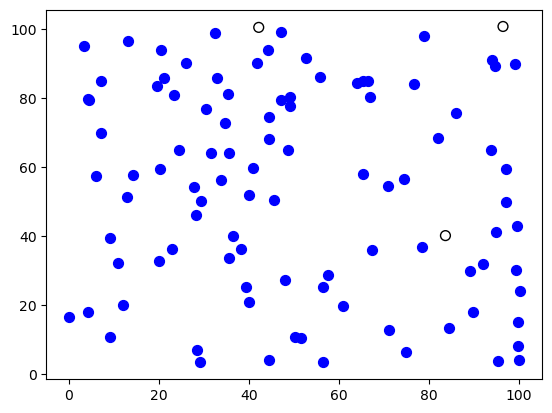

In [122]:
plot_t_days(12)

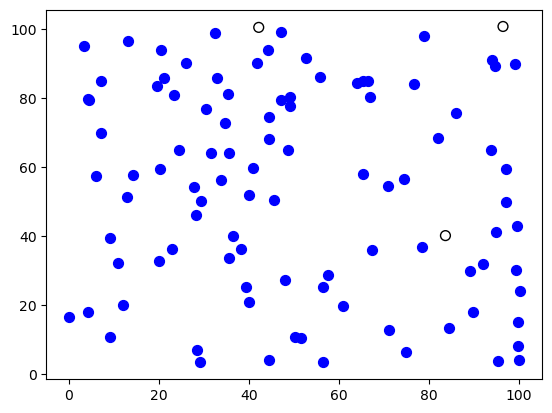

In [123]:
plot_t_days(13)

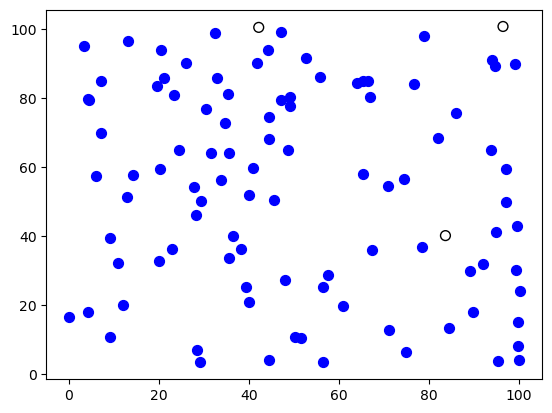

In [124]:
plot_t_days(14)

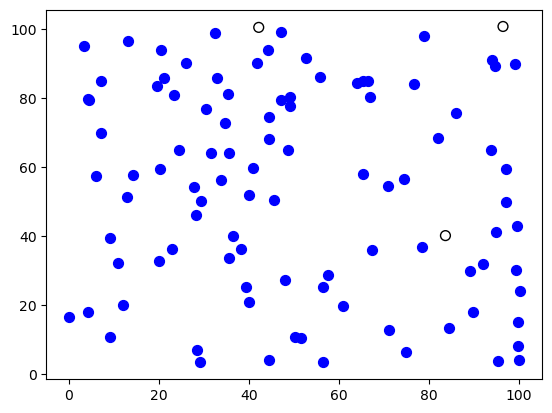

In [125]:
plot_t_days(15)

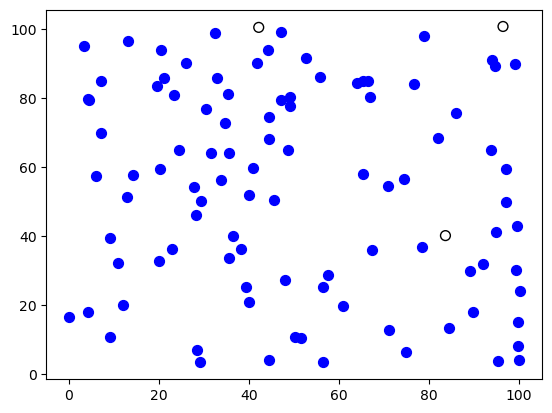

In [126]:
plot_t_days(16)

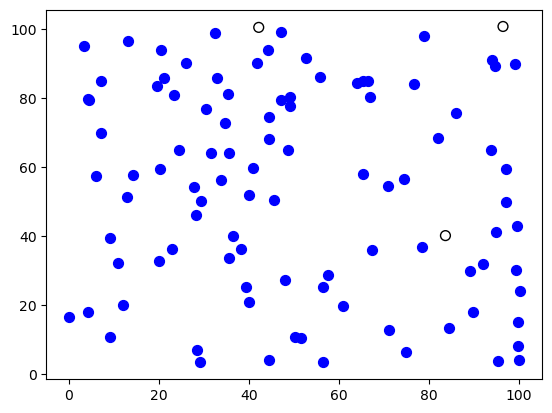

In [127]:
plot_t_days(17)

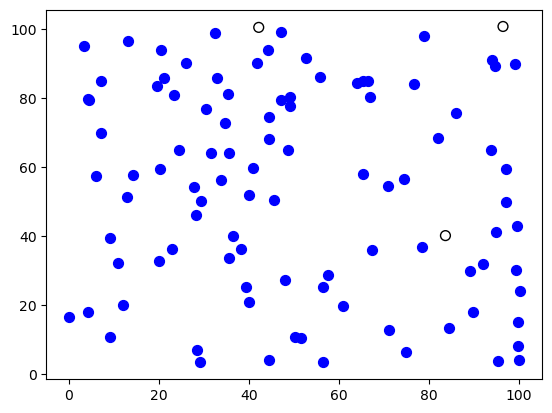

In [128]:
plot_t_days(18)

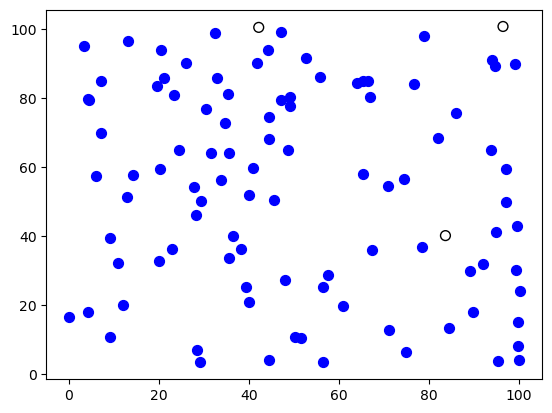

In [129]:
plot_t_days(19)

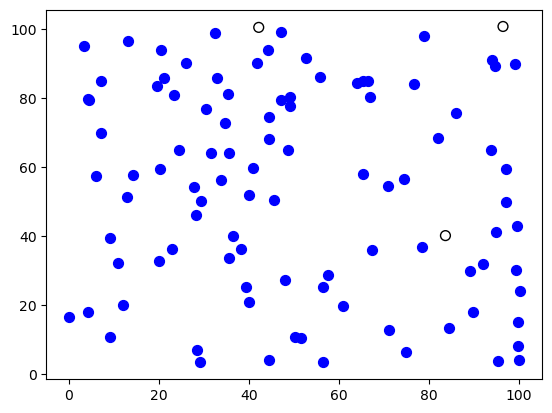

In [130]:
plot_t_days(20)

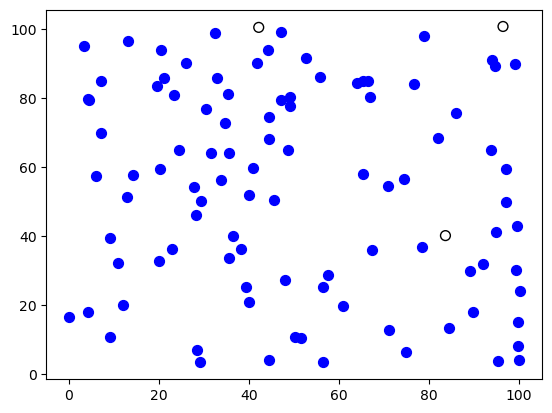

In [131]:
plot_t_days(21)

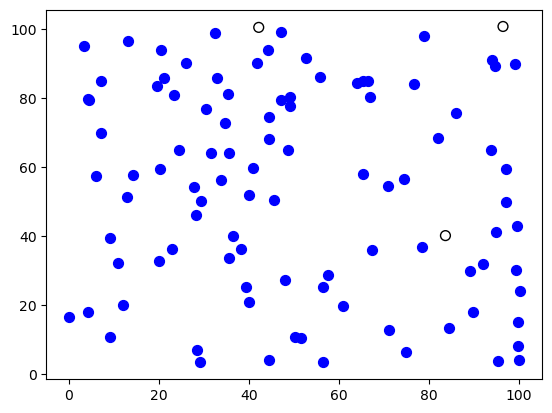

In [132]:
plot_t_days(22)

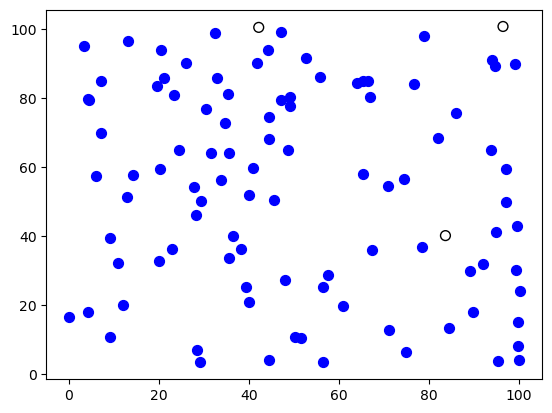

In [133]:
plot_t_days(23)

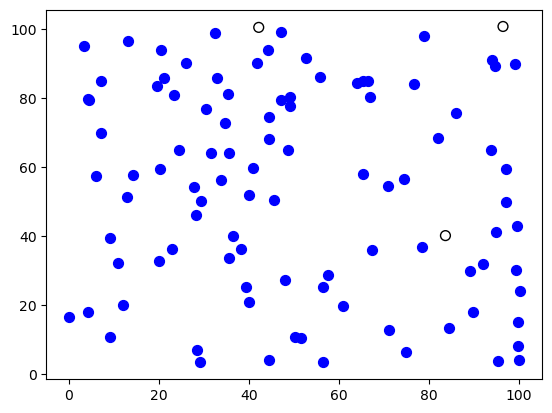

In [134]:
plot_t_days(24)

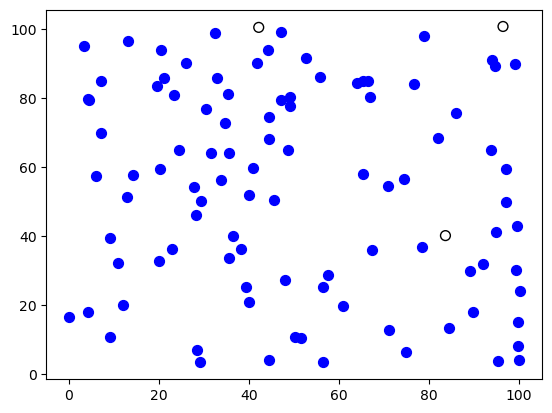

In [135]:
plot_t_days(25)

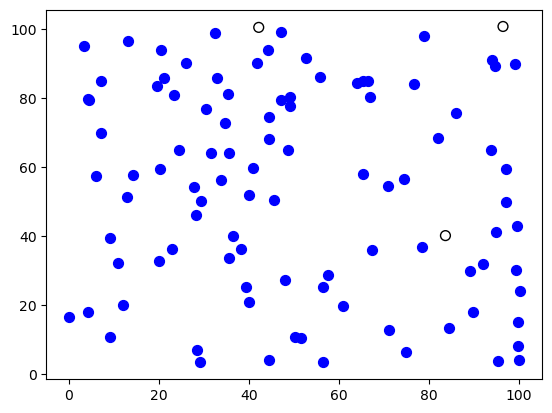

In [136]:
plot_t_days(26)

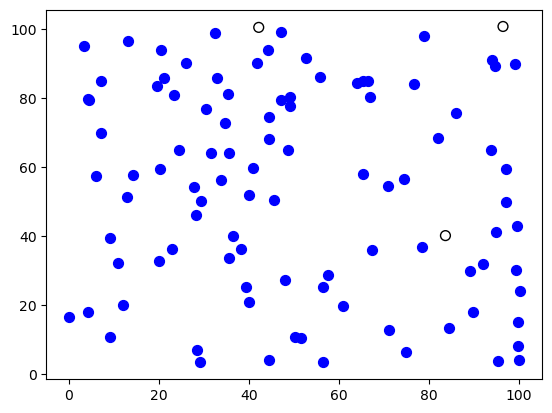

In [137]:
plot_t_days(27)

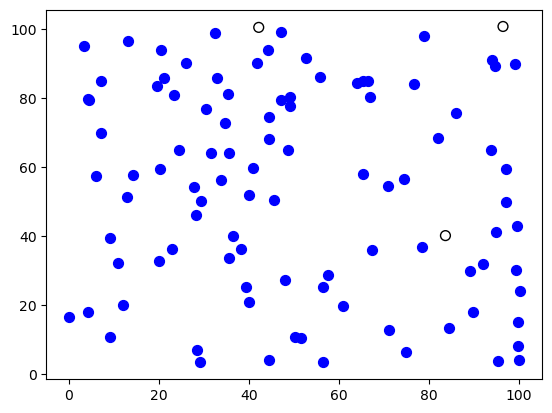

In [138]:
plot_t_days(28)

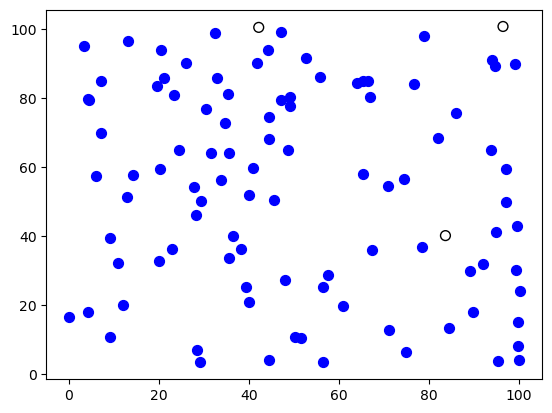

In [139]:
plot_t_days(29)

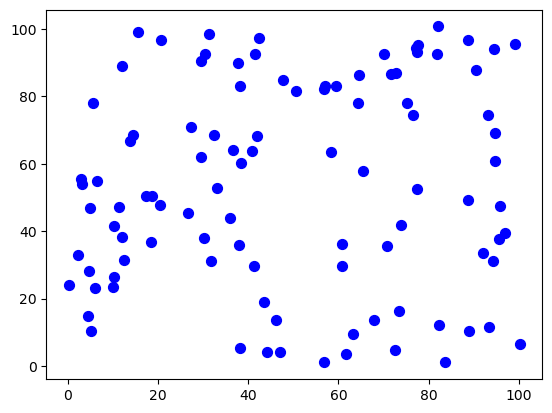

In [370]:
plot_t_days(30)

In [154]:
samples = pd.read_csv('samples.csv')
samples_epiILM = pd.read_csv('/Users/yiraozhang/Desktop/UC PhD/STAT601/compositeILMtest/samples.csv')

In [155]:
samples_a0 = pd.DataFrame(samples["a0"])
samples_a1 = pd.DataFrame(samples["a1"])
samples_beta = pd.DataFrame(samples["beta"])
samples_epi_a0 = pd.DataFrame(samples_epiILM["alpha.1"])
samples_epi_a1 = pd.DataFrame(samples_epiILM["alpha.2"])
samples_epi_beta = pd.DataFrame(samples_epiILM["beta.1"])

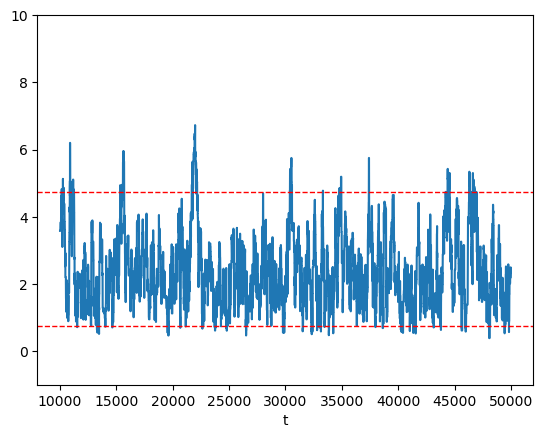

In [156]:
times = range(9999,50000)
plt.plot(times, samples_a0[9999:50000])
plt.ylim(-1, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()
#plt.savefig("mixturemodel_beta11")

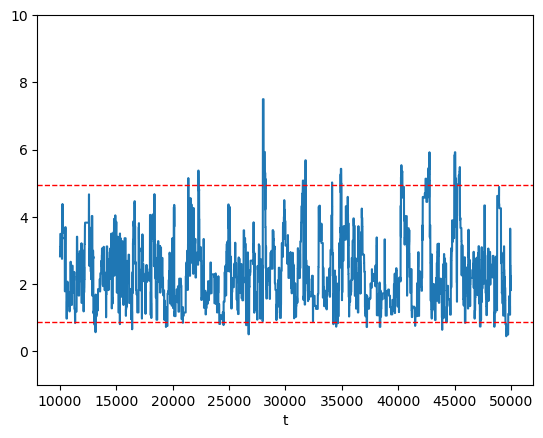

In [157]:
times = range(9999,50000)
plt.plot(times, samples_epi_a0[9999:50000])
plt.ylim(-1, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_epi_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_epi_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()
#plt.savefig("mixturemodel_beta11")

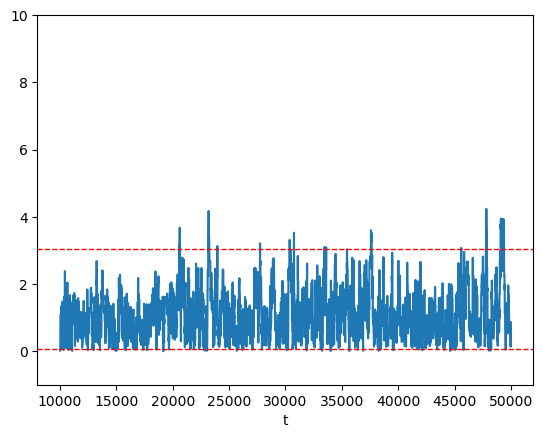

In [158]:
times = range(9999,50000)
plt.plot(times, samples_a1[9999:50000])
plt.ylim(-1, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

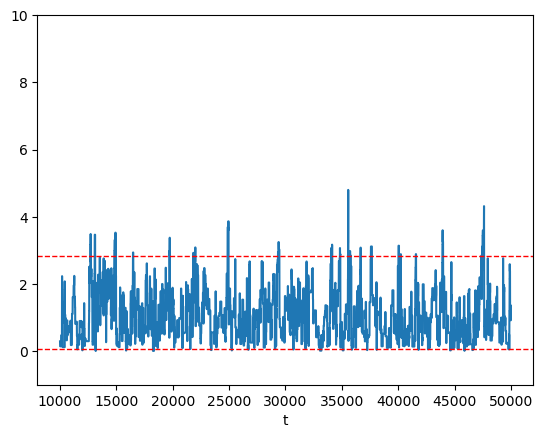

In [159]:
times = range(9999,50000)
plt.plot(times, samples_epi_a1[9999:50000])
plt.ylim(-1, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_epi_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_epi_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()
#plt.savefig("mixturemodel_beta11")

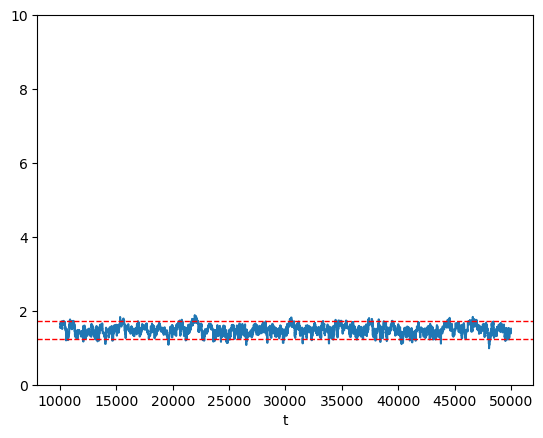

In [160]:
times = range(9999,50000)
plt.plot(times, samples_beta[9999:50000])
plt.ylim(0, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

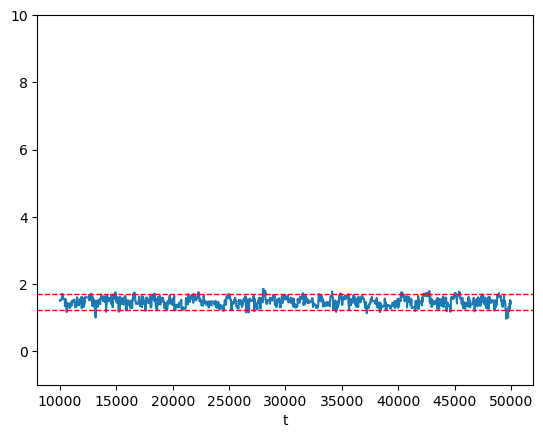

In [161]:
times = range(9999,50000)
plt.plot(times, samples_epi_beta[9999:50000])
plt.ylim(-1, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_epi_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_epi_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()
#plt.savefig("mixturemodel_beta11")

In [162]:
print(np.mean(samples_a0[9999:50000]))
print(samples_a0.quantile(0.025)[0], samples_a0.quantile(0.975)[0])

a0    2.376479
dtype: float64
0.742796 4.74227


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [163]:
print(np.mean(samples_epi_a0[9999:50000]))
print(samples_epi_a0.quantile(0.025)[0], samples_epi_a0.quantile(0.975)[0])

alpha.1    2.353588
dtype: float64
0.862411112649156 4.95213467088415


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [164]:
print(np.mean(samples_a1[9999:50000]))
print(samples_a1.quantile(0.025)[0], samples_a1.quantile(0.975)[0])

a1    1.095516
dtype: float64
0.0762389 3.04697


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [165]:
print(np.mean(samples_epi_a1[9999:50000]))
print(samples_epi_a1.quantile(0.025)[0], samples_epi_a1.quantile(0.975)[0])

alpha.2    1.057568
dtype: float64
0.0598806479665284 2.82281286703136


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [166]:
print(np.mean(samples_beta[9999:50000]))
print(samples_beta.quantile(0.025)[0], samples_beta.quantile(0.975)[0])

beta    1.481659
dtype: float64
1.22516 1.71179


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [167]:
print(np.mean(samples_epi_beta[9999:50000]))
print(samples_epi_beta.quantile(0.025)[0], samples_epi_beta.quantile(0.975)[0])

beta.1    1.473101
dtype: float64
1.21646797609345 1.69140825879003


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [46]:
samples_log = pd.read_csv('samples_logtransform.csv')

In [47]:
samples_log_a0 = pd.DataFrame(samples_log["a0"])
samples_log_a1 = pd.DataFrame(samples_log["a1"])
samples_log_beta = pd.DataFrame(samples_log["beta"])

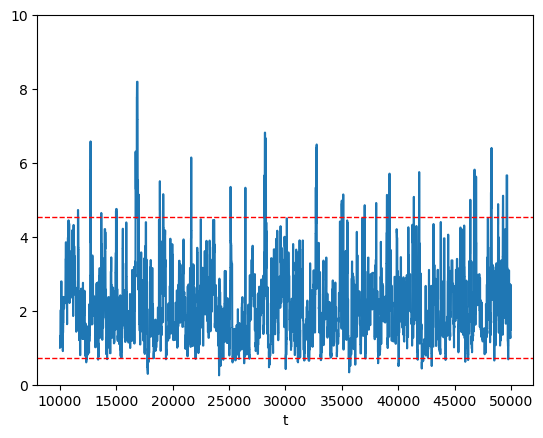

In [210]:
times = range(9999,50000)
plt.plot(times, samples_log_a0[9999:50000])
plt.ylim(0, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_log_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_log_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

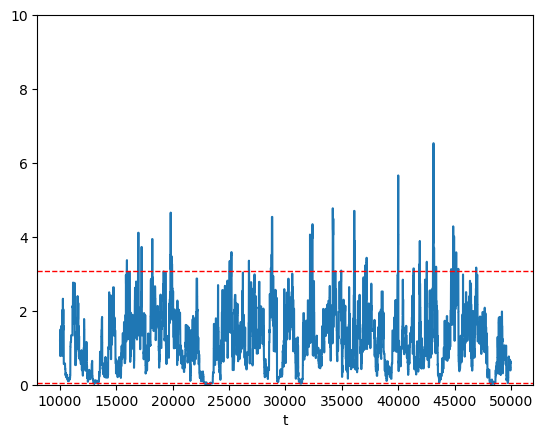

In [48]:
times = range(9999,50000)
plt.plot(times, samples_log_a1[9999:50000])
plt.ylim(0, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_log_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_log_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

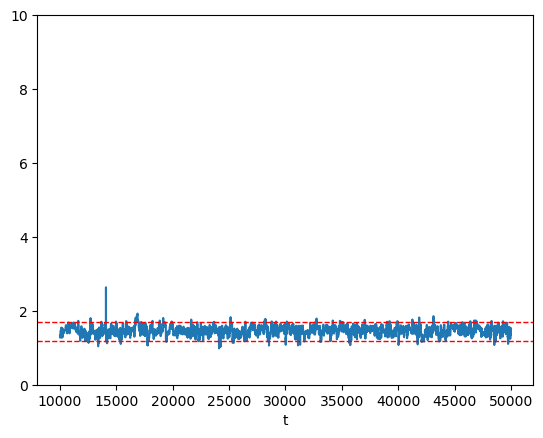

In [49]:
times = range(9999,50000)
plt.plot(times, samples_log_beta[9999:50000])
plt.ylim(0, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_log_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_log_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [50]:
print(np.mean(samples_log_a0[9999:50000]))

a0    2.151671
dtype: float64


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [51]:
print(np.mean(samples_log_a1[9999:50000]))

a1    1.229017
dtype: float64


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [52]:
print(np.mean(samples_log_beta[9999:50000]))

beta    1.465575
dtype: float64


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
